# Методичка

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target

In [ ]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.8000000000000002


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

<Axes: >

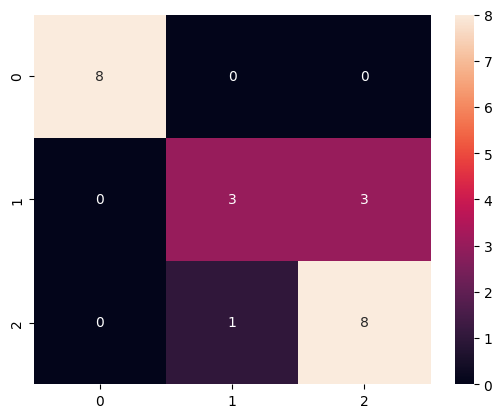

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


<Axes: >

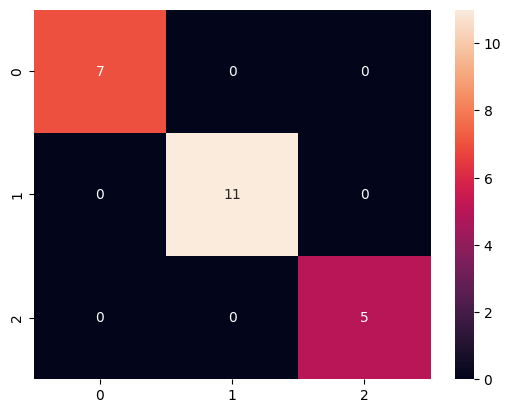

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


<Axes: >

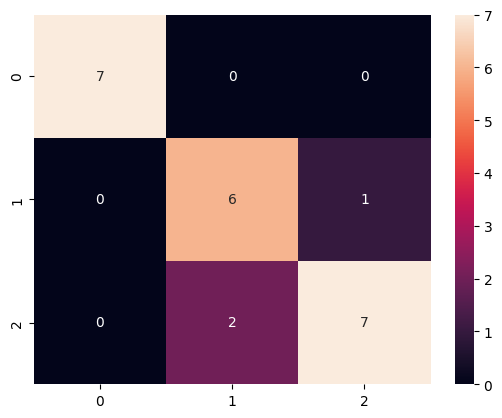

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Перекрестная проверка

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

In [ ]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

In [ ]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [ ]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [ ]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


In [ ]:
print("Дисперсия по кросс-валидации: ", np.array(metrics_f1).std())

Дисперсия по кросс-валидации:  0.03331408853235519


In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


Stratified k-Fold

In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


Leave-one-out

In [ ]:
loo = LeaveOneOut()

In [ ]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


# Самостоятельная часть

## 1

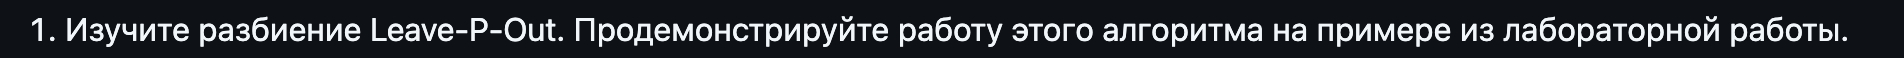

In [ ]:
from sklearn.model_selection import LeavePOut

In [ ]:
lpo = LeavePOut(2)

In [ ]:
for train_index, test_index in lpo.split(X):
    print(f'train: {train_index}, test: {test_index}')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Выходные данные были обрезаны до нескольких последних строк (5000).
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 117 118 119 120 121 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149], test: [116 122]
train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 117 118 119 120 121 122 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 1

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = lpo,                # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [1. 1. 1. ... 1. 1. 1.]
Среднее по кросс-валидации:  0.9405219985085758
Дисперсия по кросс-валидации:  0.1912893727109225


## 2

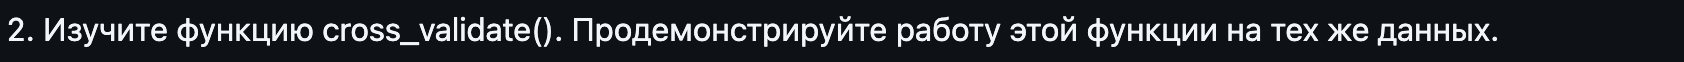

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
kf = KFold(n_splits = 5,shuffle=True, random_state=15)
kf

KFold(n_splits=5, random_state=15, shuffle=True)

In [ ]:
result = cross_validate(model, X, y, cv=kf, scoring=('accuracy', 'f1_macro'), return_train_score=True, n_jobs=-1)
result

{'fit_time': array([0.0106771 , 0.0030129 , 0.00242519, 0.00191665, 0.0020144 ]),
 'score_time': array([0.01310229, 0.00499082, 0.00445294, 0.00432587, 0.00434804]),
 'test_accuracy': array([0.93333333, 0.96666667, 1.        , 0.9       , 0.93333333]),
 'train_accuracy': array([0.94166667, 0.96666667, 0.96666667, 0.95833333, 0.95833333]),
 'test_f1_macro': array([0.93732194, 0.96444444, 1.        , 0.88070175, 0.92962963]),
 'train_f1_macro': array([0.9389569 , 0.96664582, 0.96572182, 0.95974587, 0.95882263])}

In [ ]:
print(f'Среднее fit_time: {result["fit_time"].mean()}')
print(f'Среднее score_time: {result["score_time"].mean()}')
print(f'Среднее test_accuracy: {result["test_accuracy"].mean()}')
print(f'Среднее train_accuracy: {result["train_accuracy"].mean()}')
print(f'Среднее test_f1_macro: {result["test_f1_macro"].mean()}')
print(f'Среднее train_f1_macro: {result["train_f1_macro"].mean()}')

Среднее fit_time: 0.004009246826171875
Среднее score_time: 0.006243991851806641
Среднее test_accuracy: 0.9466666666666667
Среднее train_accuracy: 0.9583333333333334
Среднее test_f1_macro: 0.9424195531563953
Среднее train_f1_macro: 0.9579786076677553


## 3

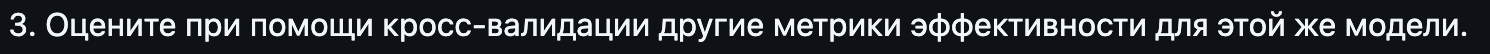

In [ ]:
result = cross_validate(model, X, y, cv=kf, scoring=('precision_macro','recall_macro', 'roc_auc_ovr', 'balanced_accuracy'), n_jobs=-1)
result

{'fit_time': array([0.00378418, 0.0023334 , 0.00206232, 0.00204563, 0.00201488]),
 'score_time': array([0.01350069, 0.01681376, 0.01274347, 0.01306248, 0.01277542]),
 'test_precision_macro': array([0.93732194, 0.97435897, 1.        , 0.90909091, 0.92962963]),
 'test_recall_macro': array([0.93732194, 0.95833333, 1.        , 0.88888889, 0.92962963]),
 'test_roc_auc_ovr': array([0.9984917 , 0.9931257 , 1.        , 0.95258137, 0.99313933]),
 'test_balanced_accuracy': array([0.93732194, 0.95833333, 1.        , 0.88888889, 0.92962963])}

In [ ]:
print(f'Среднее fit_time: {result["fit_time"].mean()}')
print(f'Среднее score_time: {result["score_time"].mean()}')
print(f'Среднее test_precision_macro: {result["test_precision_macro"].mean()}')
print(f'Среднее test_recall_macro: {result["test_recall_macro"].mean()}')
print(f'Среднее test_roc_auc_ovr: {result["test_roc_auc_ovr"].mean()}')
print(f'Среднее test_balanced_accuracy: {result["test_balanced_accuracy"].mean()}')

Среднее fit_time: 0.0024480819702148438
Среднее score_time: 0.013779163360595703
Среднее test_precision_macro: 0.95008029008029
Среднее test_recall_macro: 0.9428347578347578
Среднее test_roc_auc_ovr: 0.9874676209774249
Среднее test_balanced_accuracy: 0.9428347578347578


## 4

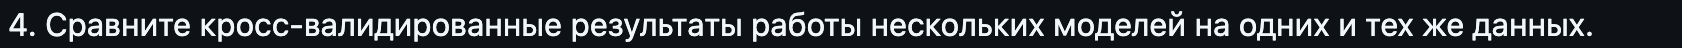

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
kf = KFold(n_splits = 6, shuffle=True, random_state=4)
kf

KFold(n_splits=6, random_state=4, shuffle=True)

In [ ]:
log_reg_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()

In [ ]:
log_reg_scores = cross_validate(log_reg_model, X, y, cv=kf)
svm_scores = cross_validate(svm_model, X, y, cv=kf)
random_forest_scores = cross_validate(random_forest_model, X, y, cv=kf)
knn_scores = cross_validate(knn_model, X, y, cv=kf)
naive_bayes_scores = cross_validate(naive_bayes_model, X, y, cv=kf)
decision_tree_scores = cross_validate(decision_tree_model, X, y, cv=kf)
mlp_scores = cross_validate(mlp_model, X, y, cv=kf)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
print("Logistic Regression")
print(f"Accuracy: {log_reg_scores['test_score'].mean()}")
print(f"Fit time: {log_reg_scores['fit_time'].mean()}")

print("SVM")
print(f"Accuracy: {svm_scores['test_score'].mean()}")
print(f"Fit time: {svm_scores['fit_time'].mean()}")

print("Random Forest")
print(f"Accuracy: {random_forest_scores['test_score'].mean()}")
print(f"Fit time: {random_forest_scores['fit_time'].mean()}")

print("KNN")
print(f"Accuracy: {knn_scores['test_score'].mean()}")
print(f"Fit time: {knn_scores['fit_time'].mean()}")

print("Naive Bayes")
print(f"Accuracy: {naive_bayes_scores['test_score'].mean()}")
print(f"Fit time: {naive_bayes_scores['fit_time'].mean()}")

print("Decision Tree")
print(f"Accuracy: {decision_tree_scores['test_score'].mean()}")
print(f"Fit time: {decision_tree_scores['fit_time'].mean()}")

print("MLP")
print(f"Accuracy: {mlp_scores['test_score'].mean()}")
print(f"Fit time: {mlp_scores['fit_time'].mean()}")

Logistic Regression
Accuracy: 0.9666666666666667
Fit time: 0.01446537176767985
SVM
Accuracy: 0.9666666666666667
Fit time: 0.0016419092814127605
Random Forest
Accuracy: 0.96
Fit time: 0.15286807219187418
KNN
Accuracy: 0.9733333333333333
Fit time: 0.0010236104329427083
Naive Bayes
Accuracy: 0.9533333333333333
Fit time: 0.0010516643524169922
Decision Tree
Accuracy: 0.9666666666666667
Fit time: 0.0009665489196777344
MLP
Accuracy: 0.9733333333333333
Fit time: 0.13927698135375977


KNN является лучшим выбором так как наилучшая акьюраси ближе всего к единицы и обучается за минимальное время


Naive Bayes худший выбор

## 5

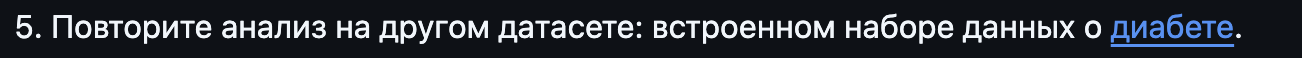

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
pd.DataFrame(diabetes.data).head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
pd.DataFrame(diabetes.target).head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_model = LinearRegression()
log_reg_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()

In [ ]:
reg_model_scores = cross_validate(reg_model, X, y, cv=kf, scoring='r2')
log_reg_scores = cross_validate(log_reg_model, X, y, cv=kf, scoring='r2')
svm_scores = cross_validate(svm_model, X, y, cv=kf, scoring='r2')
random_forest_scores = cross_validate(random_forest_model, X, y, cv=kf, scoring='r2')

In [ ]:
print("Linear Regression")
print(f"R^2: {reg_model_scores['test_score'].mean()}")
print(f"Fit time: {reg_model_scores['fit_time'].mean()}")
print(f"Score time: {reg_model_scores['score_time'].mean()}")

print("Logistic Regression")
print(f"R^2: {log_reg_scores['test_score'].mean()}")
print(f"Fit time: {log_reg_scores['fit_time'].mean()}")
print(f"Score time: {log_reg_scores['score_time'].mean()}")

print("SVM")
print(f"R^2: {svm_scores['test_score'].mean()}")
print(f"Fit time: {svm_scores['fit_time'].mean()}")
print(f"Score time: {svm_scores['score_time'].mean()}")

print("Random Forest")
print(f"R^2: {random_forest_scores['test_score'].mean()}")
print(f"Fit time: {random_forest_scores['fit_time'].mean()}")
print(f"Score time: {random_forest_scores['score_time'].mean()}")

Linear Regression
R^2: 0.4854160678924931
Fit time: 0.004822174708048503
Score time: 0.001188198725382487
Logistic Regression
R^2: -0.35117453531772425
Fit time: 0.02264098326365153
Score time: 0.0018815199534098308
SVM
R^2: 0.05898357196614046
Fit time: 0.09476987520853679
Score time: 0.01946123441060384
Random Forest
R^2: 0.021432298700565084
Fit time: 0.6226465702056885
Score time: 0.01692640781402588


Linear Regression является лучшей моделью

Logistic Regression является худшей моделью

## 6

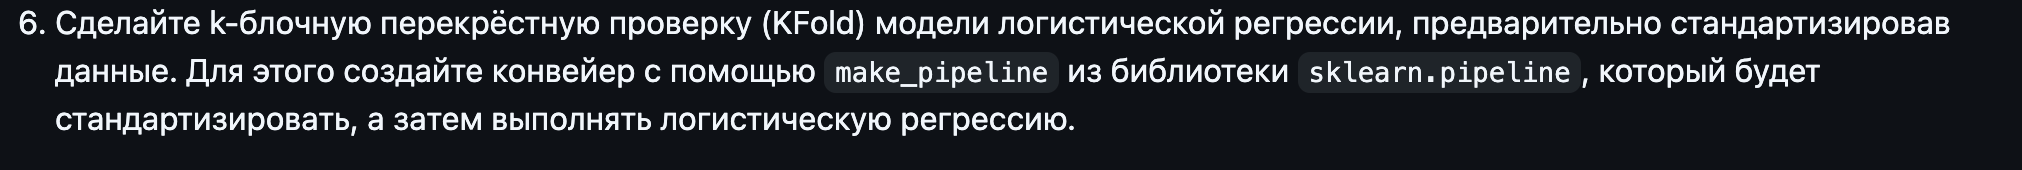

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
result = cross_validate(pipeline, X, y, cv=kf, scoring='r2')
result

{'fit_time': array([0.00572491, 0.00406122, 0.00246119, 0.00365901, 0.00349116,
        0.00368571]),
 'score_time': array([0.00274229, 0.00182199, 0.00163436, 0.00280094, 0.00237894,
        0.00227022]),
 'test_score': array([0.4652383 , 0.50829915, 0.51326723, 0.48572581, 0.50927185,
        0.43069407])}

In [ ]:
print(f'Среднее fit_time: {result["fit_time"].mean()}')
print(f'Среднее score_time: {result["score_time"].mean()}')
print(f'Среднее test_r2: {result["test_score"].mean()}')

Среднее fit_time: 0.003847201665242513
Среднее score_time: 0.002274791399637858
Среднее test_r2: 0.48541606789249325
